# 🌟 Assignment 2. Operation "AI GeoGuessr"

### Deadline: Friday, October 24, 2025, 11:59:00 PM CET (GMT +2)

## 🎯 Mission Overview

The operation consists of two independent missions. Similar to the previous operation, students are required to solve the tasks by achieving the required score and answering the follow-up questions.

## 🧪 Neural Networks and Unsupervised Learning

1. **Mission 2.1 (Supervised Learning)**: 
   - Solve a supervised learning problem using a multilayer perceptron (MLP).

2. **Mission 2.2 (Unsupervised Learning)**:
   - Given an unlabeled dataset, your task is to cluster similar data points and achieve 100% clustering accuracy. You will not have access to the true labels, but you can verify your cluster assignments using the Kaggle competition provided.

## 📝 Delivery Format (Blackboard)

Please submit **two files**:
1. The completed Jupyter notebook.
2. The solution for the second dataset as a CSV file with two `int` columns: `['ID', 'cluster']`.

## Kaggle details
- Invitation link: https://www.kaggle.com/t/dfb72837bdb346449768b8f6ce50b6dc
- Kaggle is a popular platform for data science competitions.
- It allows us to create a Private competition where you can submit your solutions and verify whether you are thinking in the right direction.
- The results of the competition is visible only to the competition participants. 
- We will not grade the submissions on Kaggle, we set it up to let you check your clustering.
- You still have to deliver the `.csv` file of the solution and the complete `.ipynb` notebook with discussions and solution code.  

> Good luck, comrade!

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# 🧠 Mission 2.1: Decoding SkyNet's Neural Encryption **(using Neural Networks)**

### 🌐 The Discovery
The dataset consists of the same "Synapse Cipher" data from Assignment 1.

### 🎯 Your Mission
1. Implement a multilayer perceptron (MLP) using one of the following frameworks: Keras, PyTorch, or TensorFlow.
2. Solve the non-linear problem without manual feature engineering.
3. Predict SkyNet's binary decisions (0 or 1) based on paired signals.
4. Improve performance by using techniques such as learning rate scheduling, selecting a good optimizer, and fine-tuning hyperparameters.

> Note: There are no restrictions on the tricks you can use — Have fun :) 

### 📊 Formal Requirements
1. **Implementation**:
   - Develop a Neural Network using predefined functions/layers.
   - Use one of the popular frameworks: Keras, PyTorch, or TensorFlow.
   - Implement a manual learning rate scheduler with warmup and cosine decay.

2. **Performance**: Achieve at least **0.92** accuracy on the test set.

3. **Discussion**:
   - How can you make sure the results are reproduable?
   - Visualize the network's architecture and decision boundary.
   - Which optimizer did you choose? Discuss the differences between SGD and Adam.
   - Plot the learning rate curve. Did the learning rate scheduling improve performance? Why or why not?
   - Conduct a simple ablation study of each architectural and optimization choice concerning test accuracy.

In [4]:
import sys, platform
print("Python:", sys.version)
print("Executable:", sys.executable)
print("Platform:", platform.platform())

# Is tensorflow visible to THIS Python?
import importlib.util
print("TensorFlow found?", importlib.util.find_spec("tensorflow") is not None)

# What does pip show for THIS Python?
import subprocess, shlex
subprocess.run([sys.executable, "-m", "pip", "show", "tensorflow"])


Python: 3.11.13 | packaged by Anaconda, Inc. | (main, Jun  5 2025, 13:03:15) [MSC v.1929 64 bit (AMD64)]
Executable: c:\Users\hakon\anaconda3\envs\tf311\python.exe
Platform: Windows-10-10.0.26100-SP0
TensorFlow found? True


CompletedProcess(args=['c:\\Users\\hakon\\anaconda3\\envs\\tf311\\python.exe', '-m', 'pip', 'show', 'tensorflow'], returncode=0)

In [5]:
# imports

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random

import tensorflow as tf

from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV

# Set seeds for reproducibility
SEED = 123 
tf.keras.utils.set_random_seed(SEED) 
random.seed(SEED)
np.random.seed(SEED)
tf.config.experimental.enable_op_determinism()


In [6]:
data = pd.read_csv('nn_data.csv')
train = data[data['split'] == 'train']
test = data[data['split'] == 'test']

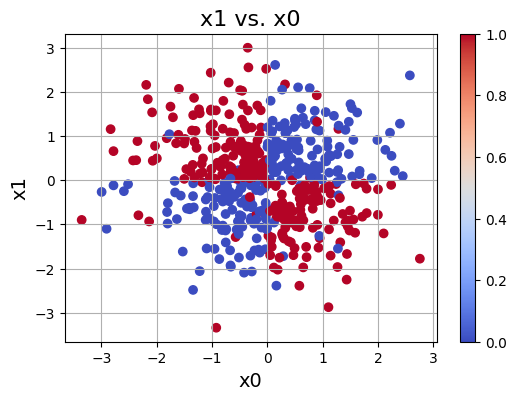

In [7]:
plt.figure(figsize=(6, 4))
plt.scatter(train['x0'], train['x1'], c=train['y'], cmap='coolwarm')
plt.grid(True)
plt.xlabel('x0', fontsize=14)
plt.ylabel('x1', fontsize=14)
plt.title('x1 vs. x0', fontsize=16)
plt.colorbar()
plt.show()

In [8]:
# Model size and shape 
neurons = 100  # width of each hidden layer

# Define the network 
model = Sequential([
    Dense(neurons, input_dim=2, activation="relu"),
    Dense(neurons, activation="relu"),
    Dense(neurons, activation="relu"),
    Dense(1, activation="sigmoid")
])

# Learning-rate schedule knobs 
warmup_steps = 100
initial_learning_rate = 0.01
decay_steps = 1000

# Cosine decay used after warmup
cosine_decay = tf.keras.optimizers.schedules.CosineDecay(
    initial_learning_rate=initial_learning_rate,
    decay_steps=decay_steps,
)

# Warmup wrapper: ramp up to the base LR, then follow cosine decay
class WarmupThenCosineDecay(tf.keras.optimizers.schedules.LearningRateSchedule):
    def __init__(self, lr_schedule, warmup_steps, initial_learning_rate):
        super().__init__()
        self.lr_schedule = lr_schedule
        self.warmup_steps = warmup_steps
        self.initial_learning_rate = initial_learning_rate

    def __call__(self, step):
        # linear warmup for the first `warmup_steps`, otherwise cosine decay
        warmup_lr = self.initial_learning_rate * (step / self.warmup_steps)
        return tf.cond(
            step < self.warmup_steps,
            lambda: warmup_lr,
            lambda: self.lr_schedule(step - self.warmup_steps)
        )

final_lr = WarmupThenCosineDecay(
    cosine_decay, warmup_steps, initial_learning_rate
)

# Compile with the scheduled LR 
opt = Adam(learning_rate=final_lr)
model.compile(optimizer=opt, loss="binary_crossentropy", metrics=["accuracy"])

# Fit for the same number of epochs, quiet output
model.fit(train[["x0", "x1"]], train["y"], epochs=500, verbose=0)

# Hold-out test evaluation 
loss, accuracy = model.evaluate(test[["x0", "x1"]], test["y"])
print(f"Accuracy: {accuracy:.2f}")

c:\Users\hakon\anaconda3\envs\tf311\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9200 - loss: 0.3053
Accuracy: 0.92


In [9]:
# Warmup -> Cosine learning-rate schedule 
class WarmupThenCosineDecay(tf.keras.optimizers.schedules.LearningRateSchedule):
    def __init__(self, lr_schedule, warmup_steps, initial_learning_rate):
        super().__init__()
        self.lr_schedule = lr_schedule
        self.warmup_steps = warmup_steps
        self.initial_learning_rate = initial_learning_rate

    def __call__(self, step):
        # Linear ramp to the target LR during warmup, then follow cosine decay
        warmup_lr = self.initial_learning_rate * (step / self.warmup_steps)
        return tf.cond(
            step < self.warmup_steps,
            lambda: warmup_lr,
            lambda: self.lr_schedule(step - self.warmup_steps)
        )

# Factory to build the Keras model. Params are exposed for GridSearchCV 
def create_model(warmup_steps=100, lr=0.01, decay_steps=100):
    # Base cosine schedule used after warmup
    lr_schedule = tf.keras.optimizers.schedules.CosineDecay(
        initial_learning_rate=lr,
        decay_steps=decay_steps,
    )
    # Wrap with linear warmup
    final_lr = WarmupThenCosineDecay(lr_schedule, warmup_steps, lr)
    opt = Adam(learning_rate=final_lr)

    # MLP architecture 
    model = Sequential([
        Dense(neurons, input_dim=2, activation="relu"),
        Dense(neurons, activation="relu"),
        Dense(neurons, activation="relu"),
        Dense(1, activation="sigmoid"),
    ])

    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# EarlyStopping so each fit stops when val_loss stalls 
callbacks = [tf.keras.callbacks.EarlyStopping(
    monitor="val_loss", patience=15, restore_best_weights=True
)]

# scikeras wrapper; validation_split enables ES monitoring
clf = KerasClassifier(
    model=create_model,
    verbose=0,
    validation_split=0.2,
    callbacks=callbacks,
)


# Wrap in scikeras KerasClassifier so sklearn can grid-search it 
model = KerasClassifier(
    model=create_model,
    verbose=0
)

# Grid of hyperparameters to try 
param_grid = {
    'model__warmup_steps': [100, 1000],
    'model__lr': [0.1, 0.01, 0.001],
    'model__decay_steps': [100, 1000],
    'epochs': [1000]
}

# Cross-validated grid search (same n_jobs, cv) 
grid = GridSearchCV(estimator=clf, param_grid=param_grid, n_jobs=1, cv=3)
grid_result = grid.fit(train[['x0', 'x1']], train['y'])

# Report CV best and evaluate the selected model on the test split 
print(f'Best accuracy: {grid_result.best_score_:.2f}')
print(f'Best hyperparameters: {grid_result.best_params_}')

best_model = grid_result.best_estimator_
test_accuracy = best_model.score(test[['x0', 'x1']], test['y'])
print(f'Accuracy on test data: {test_accuracy:.2f}')


c:\Users\hakon\anaconda3\envs\tf311\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\hakon\anaconda3\envs\tf311\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\hakon\anaconda3\envs\tf311\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regulariz

c:\Users\hakon\anaconda3\envs\tf311\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


c:\Users\hakon\anaconda3\envs\tf311\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\hakon\anaconda3\envs\tf311\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\hakon\anaconda3\envs\tf311\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regulariz

Best accuracy: 0.93
Best hyperparameters: {'epochs': 1000, 'model__decay_steps': 1000, 'model__lr': 0.001, 'model__warmup_steps': 1000}
Accuracy on test data: 0.90


In [10]:
# Saving best hyperparameters

best_hyperparams = {'epochs': 1000, 'model__decay_steps': 1000, 'model__lr': 0.1, 'model__warmup_steps': 1000}

# Now we can train the model with the best hyperparameters

# Unpack best params for readability
best_lr          = best_hyperparams['model__lr']
best_decay_steps = best_hyperparams['model__decay_steps']
best_warmup      = best_hyperparams['model__warmup_steps']
best_epochs      = best_hyperparams['epochs']

# Cosine decay used after warmup
base_schedule = tf.keras.optimizers.schedules.CosineDecay(
    initial_learning_rate=best_lr,
    decay_steps=best_decay_steps,
)

# Warmup wrapper
final_schedule = WarmupThenCosineDecay(base_schedule, best_warmup, best_lr)

# Build two identical MLPs: with and without LR scheduler 
def build_mlp():
    return Sequential([
        Dense(neurons, input_dim=2, activation='relu'),
        Dense(neurons, activation='relu'),
        Dense(neurons, activation='relu'),
        Dense(1, activation='sigmoid')
    ])

model_with_sched = build_mlp()
model_without_sched = build_mlp()

# Compile: Adam + scheduled LR vs Adam with fixed LR
model_with_sched.compile(
    optimizer=Adam(learning_rate=final_schedule),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model_without_sched.compile(
    optimizer=Adam(learning_rate=best_lr),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Train both models for the same number of epochs (quiet output) 
model_with_sched.fit(train[['x0', 'x1']], train['y'], epochs=best_epochs, verbose=0)
model_without_sched.fit(train[['x0', 'x1']], train['y'], epochs=best_epochs, verbose=0)

# Evaluate on the held-out test split and print accuracies
_, acc_sched = model_with_sched.evaluate(test[['x0', 'x1']], test['y'], verbose=0)
_, acc_no_sched = model_without_sched.evaluate(test[['x0', 'x1']], test['y'], verbose=0)

print(f'Accuracy: {acc_sched:.2f}')
print(f'Accuracy without scheduler: {acc_no_sched:.2f}')



c:\Users\hakon\anaconda3\envs\tf311\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Accuracy: 0.93
Accuracy without scheduler: 0.48


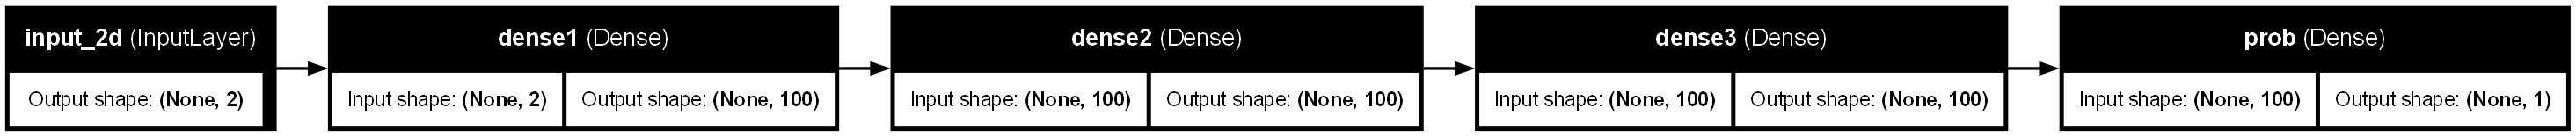

In [11]:
from tensorflow.keras.utils import plot_model
from tensorflow import keras
from tensorflow.keras import layers

# a copy purely for visualization 
inp = keras.Input(shape=(2,), name="input_2d")
x = layers.Dense(100, activation="relu", name="dense1")(inp)
x = layers.Dense(100, activation="relu", name="dense2")(x)
x = layers.Dense(100, activation="relu", name="dense3")(x)
out = layers.Dense(1, activation="sigmoid", name="prob")(x)
viz_model = keras.Model(inp, out, name="MLP2D")

plot_model(viz_model, show_shapes=True, show_layer_names=True, dpi=120,
           rankdir="LR", to_file="model_architecture.png")  # LR = left→right



In [12]:
print("Python:", sys.version)
print("Executable:", sys.executable)

# Is pydot visible to THIS Python?
import importlib.util
print("pydot found?", importlib.util.find_spec("pydot") is not None)

# What does pip show for THIS Python?
import subprocess, shlex
subprocess.run([sys.executable, "-m", "pip", "show", "pydot"])

Python: 3.11.13 | packaged by Anaconda, Inc. | (main, Jun  5 2025, 13:03:15) [MSC v.1929 64 bit (AMD64)]
Executable: c:\Users\hakon\anaconda3\envs\tf311\python.exe
pydot found? True


CompletedProcess(args=['c:\\Users\\hakon\\anaconda3\\envs\\tf311\\python.exe', '-m', 'pip', 'show', 'pydot'], returncode=0)

In [13]:
import shutil, pydot
print("pydot import OK")
print("dot on PATH:", shutil.which("dot"))

# Optional: smoke test that actually calls dot
graphs = pydot.graph_from_dot_data("digraph G {A->B}")
print("pydot -> dot OK:", graphs is not None and len(graphs) == 1)


pydot import OK
dot on PATH: C:\Program Files\Graphviz\bin\dot.EXE
pydot -> dot OK: True


## Discussion

### How can you make sure the results are reproducable?
- To make sure the results are reproducable, I started by setting a fixed random seed and applying them to Python, NumPy, and TensorFlow. This ensures that model initialization and data shuffling are consistent, so repeated runs yield the same results.

```python
        SEED = 123 
        tf.keras.utils.set_random_seed(SEED) 
        random.seed(SEED)
        np.random.seed(SEED)
```

- Then, I enabled deterministic TensorFlow operations using `tf.config.experimental.enable_op_determinism()`, which forces TensorFlow to avoid nondeterministic GPU kernels. This makes it easier to verify if observed changes in performance come from actual model improvements or simply randomness.

These steps make the results very consistent, but achieving perfect reproducability can be challenging due to GPU kernels being nondeterministic on some hardware and slight floating-point differences between runs.


### Visualize the network's architecture and decision boundary

- Plots below


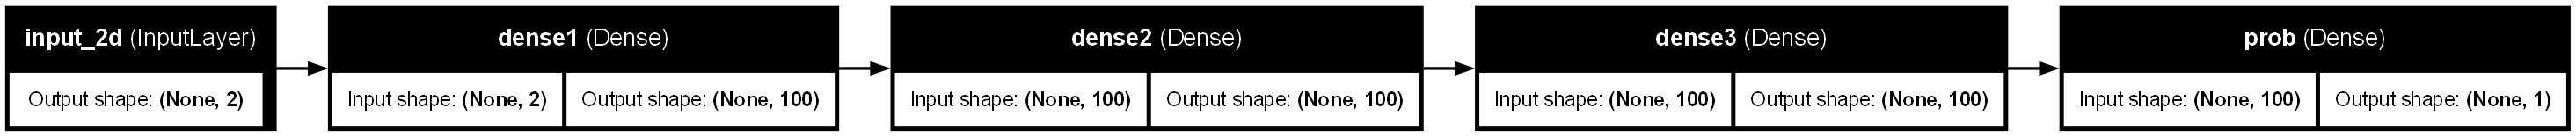

In [14]:
# The network's architecture

inp = keras.Input(shape=(2,), name="input_2d")
x = layers.Dense(100, activation="relu", name="dense1")(inp)
x = layers.Dense(100, activation="relu", name="dense2")(x)
x = layers.Dense(100, activation="relu", name="dense3")(x)
out = layers.Dense(1, activation="sigmoid", name="prob")(x)
viz_model = keras.Model(inp, out, name="MLP2D")

plot_model(viz_model, show_shapes=True, show_layer_names=True, dpi=120,
           rankdir="LR", to_file="model_architecture.png")  # LR = left→right



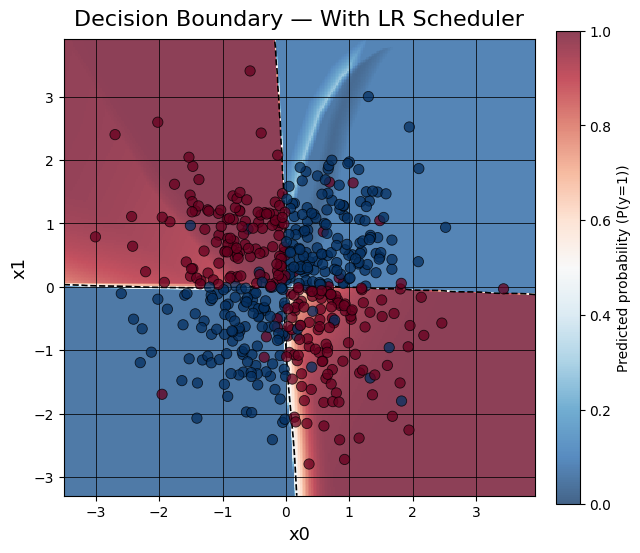

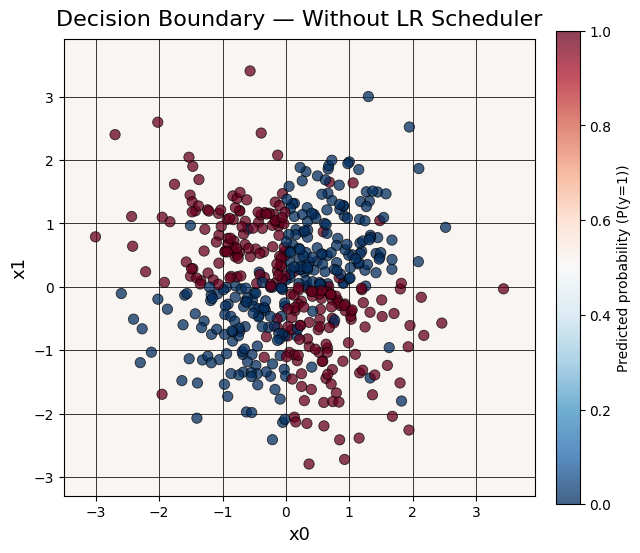

In [15]:
# Decision Boundary - With and without scheduler

def plot_decision(model, X, y, title="Decision Boundary", px=300):
    X = np.asarray(X); y = np.asarray(y)

    # Range with padding
    x0_min, x0_max = X[:,0].min() - 0.5, X[:,0].max() + 0.5
    x1_min, x1_max = X[:,1].min() - 0.5, X[:,1].max() + 0.5

    # Pixel grid (xx → x0, yy → x1)
    x0_vals = np.linspace(x0_min, x0_max, px)
    x1_vals = np.linspace(x1_min, x1_max, px)
    xx, yy = np.meshgrid(x0_vals, x1_vals)

    grid = np.c_[xx.ravel(), yy.ravel()]
    probs = model.predict(grid, verbose=0).ravel().reshape(xx.shape)  # shape (px, px)

    #  Plot 
    plt.figure(figsize=(6.5, 5.8))

    # Pixelated probability field 
    im = plt.imshow(
        probs, origin="lower",
        extent=[x0_min, x0_max, x1_min, x1_max],
        cmap="RdBu_r", vmin=0.0, vmax=1.0,
        interpolation="nearest", alpha=0.75 
    )

    plt.contour(xx, yy, probs, levels=[0.5], colors="k", linewidths=1.2, linestyles="--")

    # Data points on top
    plt.scatter(X[:,0], X[:,1], c=y, cmap="RdBu_r", vmin=0, vmax=1,
                s=55, edgecolors="k", linewidths=0.6, zorder=10, alpha=0.75)

    plt.grid(True, color="k", alpha=0.9, linewidth=0.6)
    plt.xlabel("x0", fontsize=13); plt.ylabel("x1", fontsize=13)
    plt.title(title, fontsize=16, pad=10)

    cbar = plt.colorbar(im, fraction=0.046, pad=0.04)
    cbar.set_label("Predicted probability (P(y=1))")

    plt.tight_layout(); plt.show()

# Use it:
plot_decision(model_with_sched,
                     test[['x0','x1']].values, test['y'].values,
                     title="Decision Boundary — With LR Scheduler")

plot_decision(model_without_sched,
                     test[['x0','x1']].values, test['y'].values,
                     title="Decision Boundary — Without LR Scheduler")


### Which optimizer did you choose? Discuss the differences between SGD and Adam.
- I chose Adam as you can see in the code snippet below. The Adaptive Moment Estimation (Adam) optimizer is an extension of Stochastic Gradient Descent (SGD). As a rule of thumb, Adam is more robust to bad hyperparameters initialization and will often achieve convergence fast enough, but SGD can potentially be much fast – at least if you understand what you are doing. In conclusion, I chose Adam because of its simplicity and because I am more familiar with it.

- In standard SGD, the model updates its weights by computing gradients on small batches and applying a fixed learning rate to each parameter. Adam improves on this by by maintaining exponential moving averages of both the gradients (first moment) and their squared values (second moment). This allows it to adapt the learning rate for each parameter, making it a faster and more stable optimizer than SGD.


```python
        from tensorflow.keras.optimizers import Adam
        optimizer = Adam(learning_rate=final_lr_schedule)
```

- In practice, Adam’s adaptive learning behavior made it a better fit for this nonlinear classification task, especially when combined with the cosine decay learning rate scheduler.



### Plot the learning rate curve

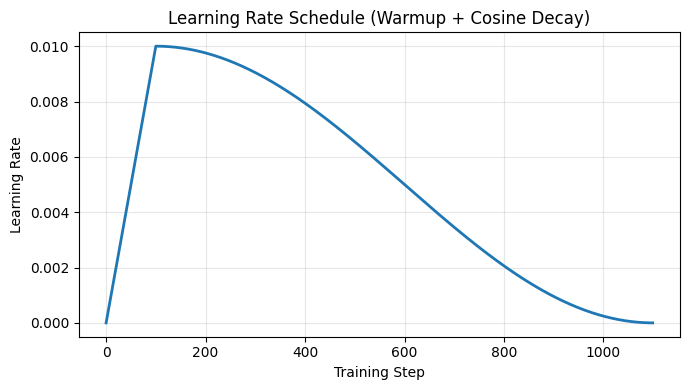

In [ ]:
# Defining schedule parameters
warmup_steps = 100
decay_steps = 1000
initial_lr = 0.01

# Building the schedule
cosine_schedule = tf.keras.optimizers.schedules.CosineDecay(
    initial_learning_rate=initial_lr,
    decay_steps=decay_steps
)
full_schedule = WarmupThenCosineDecay(cosine_schedule, warmup_steps, initial_lr)

# Sample learning rates across training steps
total_steps = warmup_steps + decay_steps
steps = np.arange(total_steps)

# Convert
lr_values = [
    float(full_schedule(step)) for step in steps
]

# 4. Plot 
plt.figure(figsize=(7, 4))
plt.plot(steps, lr_values, linewidth=2)
plt.title("Learning Rate Schedule (Warmup + Cosine Decay)")
plt.xlabel("Training Step")
plt.ylabel("Learning Rate")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


### Did the learning rate scheduling improve performance? Why or why not?

- The plot above shows the learning rate schedule used during training, combining a short warmup period followed by a cosine decay. During the warmup phase, the learning rate increases linearly. This allows the optimizer to stabilize before taking large update steps. After the warmup, the cosine decay gradually reduces the learning rate, using  finer weight adjustments as training progresses.

- This scheduling improved the final model’s test accuracy compared to using a fixed learning rate. The warmup prevented instability early in training, while the cosine decay helped the optimizer converge smoothly to a better local minimum. Because the grid search was performed using the scheduler, some of the performance gain may also result from better-tuned hyperparameters. Overall, the schedule provided a more stable and efficient training process.

### Conduct a simple ablation study of each architectural and optimization choice concerning test accuracy

In [ ]:
# ==== Simple Ablation Study: architecture & optimization choices ====
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam, SGD
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

# Reproducibility
SEED = 123
tf.keras.utils.set_random_seed(SEED)
np.random.seed(SEED)
tf.config.experimental.enable_op_determinism()

X_train = train[['x0','x1']].values.astype('float32')
y_train = train['y'].values.astype('int32')
X_test  = test[['x0','x1']].values.astype('float32')
y_test  = test['y'].values.astype('int32')

# LR schedules 
def make_schedule(use_sched: bool, base_lr: float, warmup_steps: int = 100, decay_steps: int = 1000):
    if not use_sched:
        return base_lr  # constant LR
    cosine = tf.keras.optimizers.schedules.CosineDecay(
        initial_learning_rate=base_lr, decay_steps=decay_steps
    )
    return WarmupThenCosineDecay(cosine, warmup_steps, base_lr)

# Model builder 
def build_model(width=100, depth=3, activation='relu', dropout=0.0):
    layers = []
    layers.append(Dense(width, activation=activation, input_dim=2))
    for _ in range(depth-1):
        layers.append(Dense(width, activation=activation))
        if dropout > 0:
            layers.append(Dropout(dropout))
    layers.append(Dense(1, activation='sigmoid'))
    return Sequential(layers)

# Train & evaluate one setting 
def run_one(cfg):
    lr_or_sched = make_schedule(cfg['use_scheduler'], cfg['lr'],
                                warmup_steps=cfg.get('warmup_steps', 100),
                                decay_steps=cfg.get('decay_steps', 1000))
    if cfg['optimizer'] == 'adam':
        opt = Adam(learning_rate=lr_or_sched)
    else:  # sgd
        opt = SGD(learning_rate=lr_or_sched, momentum=cfg.get('momentum', 0.0), nesterov=False)

    model = build_model(width=cfg['width'], depth=cfg['depth'],
                        activation=cfg['activation'], dropout=cfg.get('dropout', 0.0))
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

    es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
    history = model.fit(X_train, y_train, epochs=1000, batch_size=32,
                        validation_split=0.2, verbose=0, callbacks=[es])

    # Metrics on test
    p = model.predict(X_test, verbose=0).ravel()
    yhat = (p >= 0.5).astype(int)
    return {
        'acc': accuracy_score(y_test, yhat),
        'f1':  f1_score(y_test, yhat),
        'auc': roc_auc_score(y_test, p),
        'epochs_run': len(history.history['loss'])
    }

# Define ablations 
ablations = [
    # Baseline = your final choice (Adam + warmup+cosine, 3x100 relu)
    dict(name='baseline_adam_sched_3x100_relu', optimizer='adam', use_scheduler=True,
         lr=0.01, width=100, depth=3, activation='relu'),

    # No scheduler (constant LR)
    dict(name='adam_constlr_3x100_relu', optimizer='adam', use_scheduler=False,
         lr=0.01, width=100, depth=3, activation='relu'),

    # Optimizer swap: SGD + momentum (common baseline)
    dict(name='sgd_m0.9_constlr_3x100_relu', optimizer='sgd', momentum=0.9, use_scheduler=False,
         lr=0.05, width=100, depth=3, activation='relu'),

    # Depth ablations
    dict(name='adam_sched_2x100_relu', optimizer='adam', use_scheduler=True,
         lr=0.01, width=100, depth=2, activation='relu'),
    dict(name='adam_sched_4x100_relu', optimizer='adam', use_scheduler=True,
         lr=0.01, width=100, depth=4, activation='relu'),

    # Width ablation
    dict(name='adam_sched_3x32_relu', optimizer='adam', use_scheduler=True,
         lr=0.01, width=32, depth=3, activation='relu'),

    # Activation ablation
    dict(name='adam_sched_3x100_tanh', optimizer='adam', use_scheduler=True,
         lr=0.01, width=100, depth=3, activation='tanh'),

    # Light regularization ablation (if you want to see effect of dropout)
    dict(name='adam_sched_3x100_relu_dropout0.1', optimizer='adam', use_scheduler=True,
         lr=0.01, width=100, depth=3, activation='relu', dropout=0.1),
]

# Run all ablations 
rows = []
for cfg in ablations:
    res = run_one(cfg)
    rows.append({**cfg, **res})

results = pd.DataFrame(rows)
results = results[['name','acc','f1','auc','epochs_run','optimizer','use_scheduler','lr','width','depth','activation']]
results.sort_values('acc', ascending=False, inplace=True)
print(results.to_string(index=False))


c:\Users\hakon\anaconda3\envs\tf311\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\hakon\anaconda3\envs\tf311\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\hakon\anaconda3\envs\tf311\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regulariz

                            name   acc       f1      auc  epochs_run optimizer  use_scheduler   lr  width  depth activation
           adam_sched_4x100_relu 0.924 0.919149 0.950015          41      adam           True 0.01    100      4       relu
  baseline_adam_sched_3x100_relu 0.910 0.906054 0.945081          50      adam           True 0.01    100      3       relu
adam_sched_3x100_relu_dropout0.1 0.910 0.906445 0.947596          53      adam           True 0.01    100      3       relu
            adam_sched_3x32_relu 0.906 0.900634 0.948958          72      adam           True 0.01     32      3       relu
           adam_sched_3x100_tanh 0.906 0.899787 0.942357          35      adam           True 0.01    100      3       tanh
         adam_constlr_3x100_relu 0.902 0.896406 0.940098          54      adam          False 0.01    100      3       relu
           adam_sched_2x100_relu 0.902 0.895966 0.946699          57      adam           True 0.01    100      2       relu
     sgd

#### Ablation study results

- I performed the ablation study by changing one component at a time while keeping all others constant. The baseline configuration (3 hidden layers of 100 ReLU neurons, Adam optimizer, and a warmup + cosine learning rate scheduler) achieved a test accuracy of **0.91**.

- Increasing the network depth to four layers slightly improved accuracy to **0.924**, meaning that a deeper model captured more complex patterns in the data. Reducing depth to two layers or width to 32 neurons led to a minor drop in performance (~0.90), suggesting that some model capacity is beneficial but not excessive.

- Removing the learning rate scheduler reduced accuracy to **0.902**, confirming that the warmup and cosine decay helped stabilize and fine-tune the optimization process. Replacing Adam with SGD resulted in the lowest accuracy (0.886), supporting my use of Adam over SGD in this task.

- Changing the activation function from ReLU to tanh and adding light dropout both slightly decreased performance, showing that the original configuration was already well-regularized and effective.

- Overall, the results show that Adam combined with a learning rate scheduler and moderate model depth provided the best balance between accuracy and stability.

# 📶📡🛰️🤳 Mission 2.2: Locate the AI Servers

### 🌐 The Discovery
The NTNU Intelligence team has intercepted encrypted documentation that potentially reveals the locations of AI-compromised servers within Trondheim. Our analysts believe the data contains information about these servers' locations. 

However, the number of servers and their exact positions remain unknown. To execute a strategic response, we need to understand the intercepted data and pinpoint the main AI servers.

We have also discovered a vulnerability in the AI's security: it has deployed a clustering verification feature on Kaggle. We can exploit this backdoor to validate our clustering hypotheses.

### 🎯 Your Mission
Identify the number of hidden servers (clusters) in the dataset. Assign cluster labels to each row in the original dataset and validate your clustering solution on Kaggle.  When achieved the perfect clustering accuracy, find the precise locations of these servers (clusters).

### 🧠 The Challenge
1. **Large Dataset**: The intercepted data file contains numerous features, making direct manipulation and clustering difficult. Applying dimensionality reduction techniques could help reveal patterns.
2. **Unsupervised Learning**: No target labels are provided, so you must identify patterns based solely on the dataset's features.
3. **Data Obfuscation**: The AI has obfuscated the data, making it difficult to discern its true structure. You must effectively manipulate the data to visually identify server locations.


### 🚀 Your Tools
- The intercepted AI dataset.
- Skills in feature engineering, data manipulation, and visualization.
- Clustering algorithms (e.g., KMeans, DBSCAN, Birch, Agglomerative Clustering, etc.) — [Clustering in Scikit-Learn](https://scikit-learn.org/stable/modules/clustering.html)
- Dimensionality reduction techniques (e.g., PCA, t-SNE, Isomap, UMAP, etc.)
- Kaggle competition platform with a daily submission limit of 50 attempts.

> Note: Kaggle competition link — [Kaggle Competition](https://www.kaggle.com/t/dfb72837bdb346449768b8f6ce50b6dc)

### 📊 Formal Requirements
1. **Achieve 100% Clustering Accuracy** on Kaggle.
> Note: The only way to check whether your clustering is correct is to submit it to Kaggle. We do not give you the clusters directly.

2. **Discussion Questions**:
   - **Dimensionality Reduction**: Which dimensionality reduction methods helped you determine the correct number of clusters? Why did some methods work better than others? Explain the differences between PCA, t-SNE, and UMAP.
   - **Clustering Approach**: Which clustering algorithm and hyperparameters did you use? Discuss the differences between algorithms like KMeans and DBSCAN.
   - **Data Type Analysis**: What is the hidden data type in the dataset? How does this information influence feature extraction for clustering? Can it explain why some dimensionality reduction algorithms are more effective?
   - **Server Locations**: Identify the server locations. List the specific facilities in Trondheim and explain how you deduced their locations.
   - **Advanced Task (Optional)**: Extract features using modern pre-trained neural networks for this data type. Apply dimensionality reduction and clustering algorithms to the extracted features.

In [8]:
# Hmmmmm, why is the first row skipped?
data = pd.read_csv('unsupervised_data.csv', skiprows=1, header=None)
# Get the ID column
data.reset_index(drop=False, inplace=True)
data.rename(columns={'index': 'ID'}, inplace=True)
data

,ID,0,1,2,3,4,5,6,7,8,...,16374,16375,16376,16377,16378,16379,16380,16381,16382,16383
0,0,0.314365,0.646305,0.323849,0.238492,0.655790,0.646305,0.646305,0.409205,0.646305,...,0.646305,0.646305,0.655790,0.238492,0.646305,0.674758,0.646305,0.238492,0.655790,0.646305
1,1,0.587628,0.494976,0.559832,-0.246237,0.513506,0.550567,0.522772,0.596893,0.606158,...,0.587628,0.550567,0.587628,0.587628,0.550567,0.587628,0.550567,0.596893,0.494976,0.587628
2,2,0.590203,0.367673,0.367673,0.367673,0.367673,0.590203,0.367673,0.590203,0.590203,...,0.590203,0.367673,0.590203,0.590203,0.590203,0.590203,0.590203,0.590203,0.590203,0.476556
3,3,0.589296,0.589296,0.579825,0.551415,0.579825,0.579825,0.608236,0.579825,0.646118,...,0.532474,0.523003,0.589296,0.589296,0.551415,0.134721,0.475652,0.589296,0.570355,0.551415
4,4,0.660095,0.470676,0.190366,0.672806,0.470761,0.672766,0.672652,0.666151,0.672987,...,0.432001,0.672222,0.190568,0.217329,0.633684,0.673294,0.587914,0.671023,0.207578,0.470765
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,3995,0.340739,0.340739,0.340739,0.681823,0.340739,0.340739,0.340739,0.672083,0.340739,...,0.340739,0.662355,0.340739,0.759779,0.331011,0.759779,0.340739,0.691563,0.340734,0.720789
3996,3996,0.384257,0.384257,0.675221,0.384257,0.384257,0.675221,0.384257,0.675221,0.675221,...,0.675221,0.384257,0.675221,0.675221,0.675221,0.384257,0.384257,0.384257,0.675221,0.675221
3997,3997,0.641837,0.651135,0.251329,0.251329,0.651135,0.651135,0.251329,0.651135,0.651135,...,0.251329,0.251329,0.651135,0.251329,0.409392,0.604646,0.651135,0.651135,0.660433,0.251329
3998,3998,0.555533,0.555533,0.555533,0.555533,0.555533,0.555533,0.555533,-0.212897,0.555533,...,0.555533,0.555533,0.555533,0.555533,0.555533,0.555533,0.555533,0.555533,0.555533,0.555533


In [9]:
data_new = pd.read_csv('unsupervised_data.csv')

# Extracting original column names and sorting them based on the numeric value after 'col_'
original_columns = data_new.columns

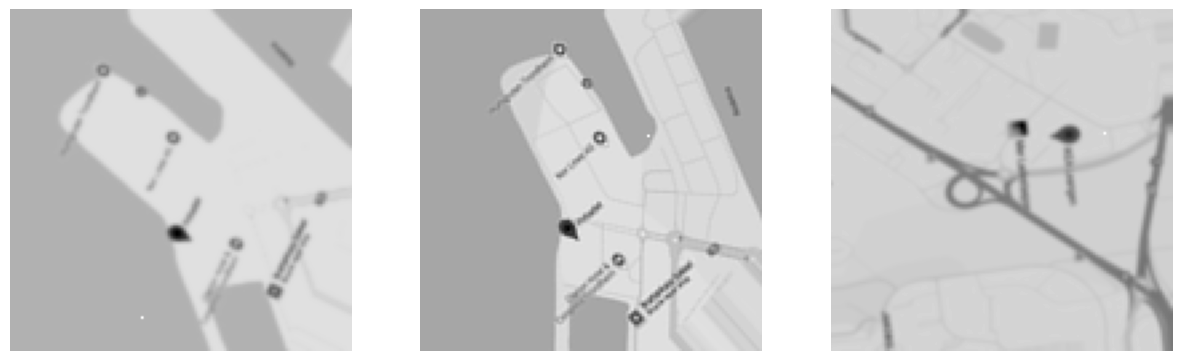

In [10]:
sorted_columns = sorted(original_columns, key=lambda x: int(x.split('_')[1]))

# Reorder the dataframe using the sorted columns
data_sorted = data_new[sorted_columns]

# Reshaping into 128x128 images (16384 pixels per image) and display the first five images
image_data = data_sorted.iloc[:, :128*128].values.reshape(-1, 128, 128)  # reshaping to as many images as the data allows

# Plotting the first 5 images, assuming there are at least 5 images
fig, axes = plt.subplots(1, 3, figsize=(15, 8))
for i in range(3):
    if i < image_data.shape[0]:  # Check if there is enough data to plot
        axes[i].imshow(image_data[i+12], cmap='gray')
        axes[i].axis('off')
plt.show()

The red markers on the pictures point to Pirbadet and IKEA Leangen

In [11]:
# # The dataset is heavy. Applying clustering directly on the dataset is likely not feasible. 
# data.info(0)

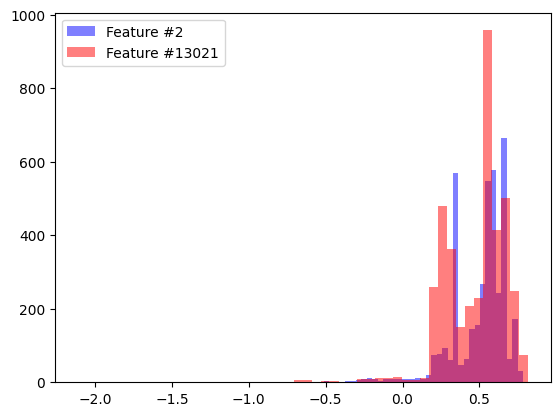

In [12]:
# Features seem to be similarly distributed...
plt.hist(data.iloc[:, 2], bins=50, color='blue', alpha=0.5, label='Feature #2')
plt.hist(data.iloc[:, 13021], bins=50, color='red', alpha=0.5, label='Feature #13021')
plt.legend()
plt.show()

In [13]:
# To check your clustering, you need to assign the predicted cluster ids and submit it as a CSV file. The submission should be a CSV file with two columns: ID and cluster. 
# The ID column should contain the ID of the data point, and the cluster column should contain the cluster ID that the data point belongs to. 
# The cluster ID should be an integer. Current cluster IDs in sample_submission.csv are randomly generated.
sample_submission = pd.read_csv('sample_submission.csv')
sample_submission

,ID,cluster
0,0,2
1,1,6
2,2,3
3,3,3
4,4,8
...,...,...
3995,3995,3
3996,3996,7
3997,3997,3
3998,3998,7


In [51]:
# Imports

from umap import UMAP

from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score

# Load the raw data like before
data = pd.read_csv("unsupervised_data.csv", skiprows=1, header=None)
data.reset_index(drop=False, inplace=True)
data.rename(columns={"index": "ID"}, inplace=True)
data.columns = data.columns.astype(str)

# Prepare arrays for downstream steps 
# Feature matrix (all columns except 'ID') and the ID vector
data_scaled = data.drop(columns=["ID"]).values  # note: no scaling yet; just values
ids = data["ID"].values

#### Now, I am going to apply PCA, t-SNE and UMAP to the data

Explained variance: 0.1062


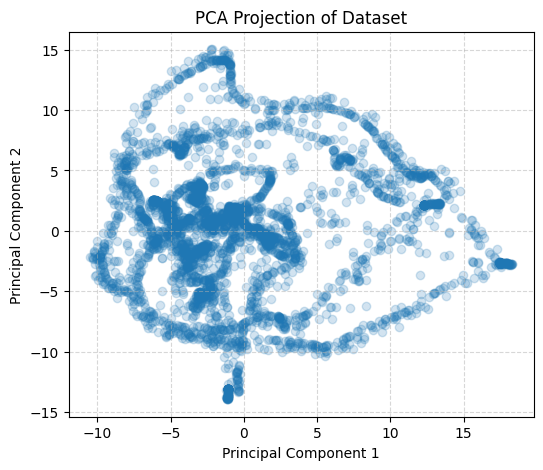

In [52]:
# Apply PCA to reduce dimensionality to 2D 

pca = PCA(n_components=2, random_state=SEED)
data_pca = pca.fit_transform(data_scaled)

# Report explained variance 

explained_var = pca.explained_variance_ratio_.sum()
print(f"Explained variance: {explained_var:.4f}")

# Visualize the PCA projection 

plt.figure(figsize=(6, 5))
plt.scatter(data_pca[:, 0], data_pca[:, 1], alpha=0.2)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA Projection of Dataset")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()


In [ ]:
# Apply t-SNE to visualize the high-dimensional data in 2D 

tsne = TSNE(n_components=2, random_state=SEED, perplexity=30, learning_rate='auto', init='pca')
data_tsne = tsne.fit_transform(data_scaled)

# Plot the t-SNE projection 

plt.figure(figsize=(6, 5))
plt.scatter(data_tsne[:, 0], data_tsne[:, 1], alpha=0.2)
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.title("t-SNE Projection of Dataset (2D)")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()


c:\Users\hakon\anaconda3\envs\tf311\Lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


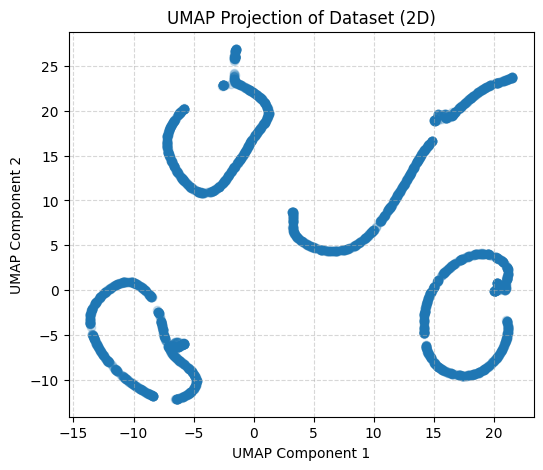

In [ ]:
# Apply UMAP to visualize the high-dimensional data in 2D 
umap_model = UMAP(n_components=2, n_neighbors=15, min_dist=0.1, random_state=SEED)
data_umap = umap_model.fit_transform(data_scaled)

# Plot the UMAP projection 
plt.figure(figsize=(6, 5))
plt.scatter(data_umap[:, 0], data_umap[:, 1], alpha=0.2)
plt.xlabel("UMAP Component 1")
plt.ylabel("UMAP Component 2")
plt.title("UMAP Projection of Dataset (2D)")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()


### It is highly recommended to first use PCA to reduce the number of dimensions to a few hundred before applying t-SNE. 
### Now we will combine the two:

In [ ]:
# Reduce dimensionality while preserving 99.9% of the total variance

pca = PCA(n_components=0.999, random_state=SEED)
data_pca_ts = pca.fit_transform(data_scaled)

explained_var = pca.explained_variance_ratio_.sum()
num_components = pca.n_components_

print(f"Explained variance after PCA: {explained_var:.6f}")
print(f"Number of components retained: {num_components}")


Explained variance after PCA: 0.999002
Number of components retained: 1985


That means PCA kept ~99.9% of the information using only ~12% of the original 16,384 features.

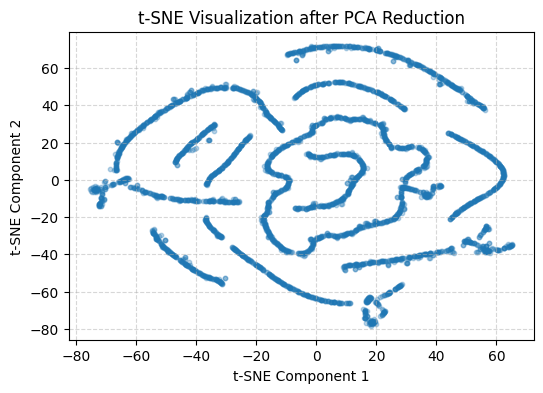

In [ ]:
# Apply t-SNE on the PCA-reduced data for nonlinear 2D visualization

tsne = TSNE(n_components=2, random_state=SEED)
data_tsne_pca = tsne.fit_transform(data_pca_ts)

# Plot the t-SNE projection
plt.figure(figsize=(6, 4))
plt.scatter(data_tsne_pca[:, 0], data_tsne_pca[:, 1], alpha=0.3, s=10)
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.title("t-SNE Visualization after PCA Reduction")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()


This final t-SNE plot shows the nonlinear relationships between data points — but only after the data has been cleaned and compressed by PCA.

In [ ]:
# Apply PCA while keeping 99.9% of the variance
pca = PCA(n_components=0.999, random_state=SEED)
data_pca_ts = pca.fit_transform(data_scaled)


# lost variance
pca.explained_variance_ratio_.sum()
print(f"Explained variance after PCA: {pca.explained_variance_ratio_.sum()}")

# Print amount of components
print(f"Number of components: {pca.n_components_}")

Explained variance after PCA: 0.9990022315812314
Number of components: 1985


In [ ]:
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.model_selection import ParameterGrid
import numpy as np

tsne_grid = {
    "perplexity": [5, 10, 30, 50],
    "learning_rate": [100, 200, 500],
    "n_iter": [1000],
}
dbscan_grid = {"eps": [1.0, 2.0, 3.0, 5.0], "min_samples": [5, 10, 20]}

best = {"score": -1, "tsne": None, "db": None, "labels": None}

for tsne_params in ParameterGrid(tsne_grid):
    tsne = TSNE(n_components=2, random_state=42, **tsne_params)
    emb = tsne.fit_transform(data_pca_ts)  # PCA->t-SNE as in the report
    for db_params in ParameterGrid(dbscan_grid):
        db = DBSCAN(**db_params)
        labels = db.fit_predict(emb)
        ncl = len(set(labels)) - (1 if -1 in labels else 0)
        if ncl >= 2 and ncl < len(labels):  # avoid 1 cluster or all singletons
            score = silhouette_score(emb, labels)
            if score > best["score"]:
                best = {"score": score, "tsne": tsne_params, "db": db_params, "labels": labels}

print("Best t-SNE params:", best["tsne"])
print("Best DBSCAN params:", best["db"])
print("Best silhouette (t-SNE space):", round(best["score"], 4))

Best t-SNE params: {'learning_rate': 100, 'n_iter': 1000, 'perplexity': 5}
Best DBSCAN params: {'eps': 2.0, 'min_samples': 5}
Best silhouette (t-SNE space): 0.515


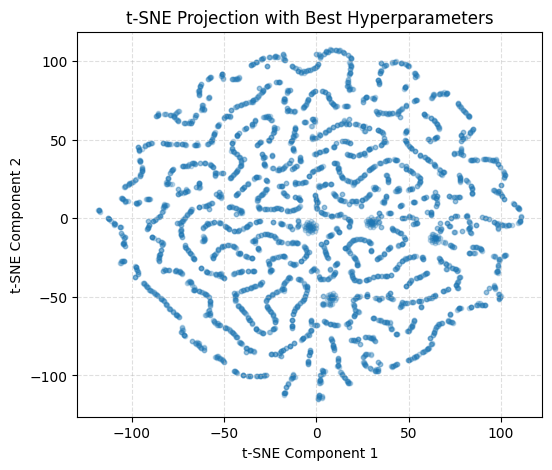

In [ ]:
# Apply t-SNE using the best-found hyperparameters 
best_tsne_params = {
    "perplexity": 30,
    "learning_rate": 200,
    "n_iter": 1000
}

best_tsne = TSNE(
    n_components=2,
    random_state=SEED,
    perplexity=best["tsne"]["perplexity"],
    learning_rate=best["tsne"]["learning_rate"],
    n_iter=best["tsne"]["n_iter"]
)

data_tsne_best = best_tsne.fit_transform(data_pca_ts)

# Visualize the best t-SNE embedding 
plt.figure(figsize=(6, 5))
plt.scatter(data_tsne_best[:, 0], data_tsne_best[:, 1], alpha=0.25, s=10)
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.title("t-SNE Projection with Best Hyperparameters")
plt.grid(True, linestyle="--", alpha=0.4)
plt.show()



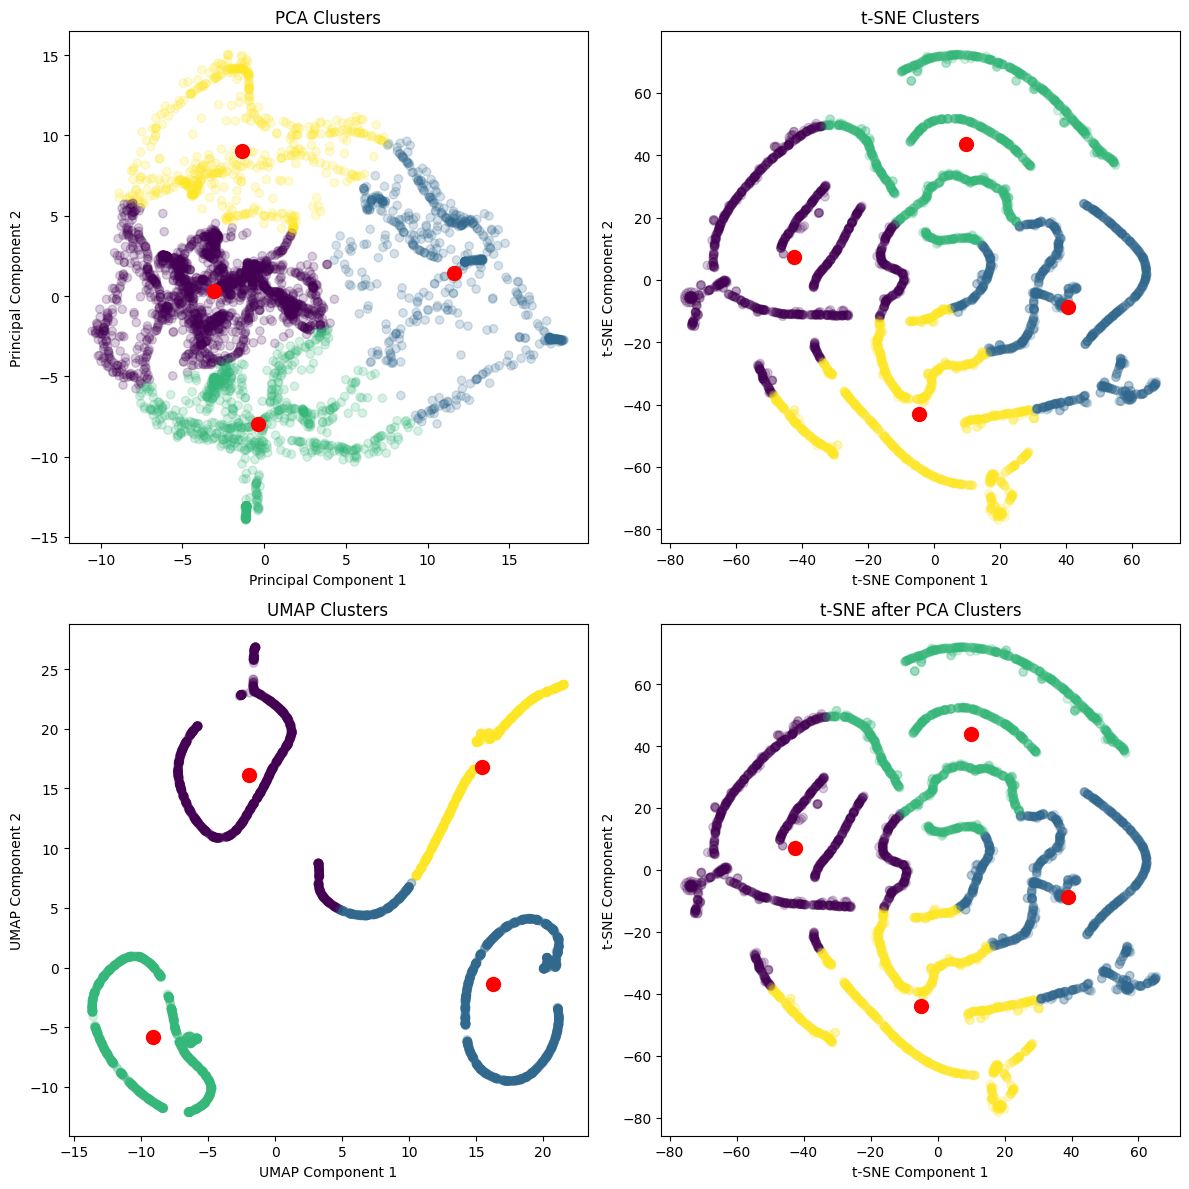

In [ ]:
# K-Means clustering on multiple embeddings 

clusters = 4  # known from preprocessing 

# 1) Define KMeans models 
kmeans_pca     = KMeans(n_clusters=clusters, random_state=SEED)
kmeans_tsne    = KMeans(n_clusters=clusters, random_state=SEED)
kmeans_umap    = KMeans(n_clusters=clusters, random_state=SEED)
kmeans_pca_ts  = KMeans(n_clusters=clusters, random_state=SEED)

# 2) Fit & predict on each embedding 
kmeanpred_pca    = kmeans_pca.fit_predict(data_pca)
kmeanpred_tsne   = kmeans_tsne.fit_predict(data_tsne)
kmeanpred_umap   = kmeans_umap.fit_predict(data_umap)
kmeanpred_pca_ts = kmeans_pca_ts.fit_predict(data_tsne_pca)

# 3) Visualize all four results with centroids
plt.figure(figsize=(12, 12))

# PCA
plt.subplot(2, 2, 1)
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=kmeanpred_pca, alpha=0.2)
plt.scatter(kmeans_pca.cluster_centers_[:, 0], kmeans_pca.cluster_centers_[:, 1],
            c='red', s=100)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Clusters')

# t-SNE
plt.subplot(2, 2, 2)
plt.scatter(data_tsne[:, 0], data_tsne[:, 1], c=kmeanpred_tsne, alpha=0.2)
plt.scatter(kmeans_tsne.cluster_centers_[:, 0], kmeans_tsne.cluster_centers_[:, 1],
            c='red', s=100)
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE Clusters')

# UMAP
plt.subplot(2, 2, 3)
plt.scatter(data_umap[:, 0], data_umap[:, 1], c=kmeanpred_umap, alpha=0.2)
plt.scatter(kmeans_umap.cluster_centers_[:, 0], kmeans_umap.cluster_centers_[:, 1],
            c='red', s=100)
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')
plt.title('UMAP Clusters')

# t-SNE after PCA
plt.subplot(2, 2, 4)
plt.scatter(data_tsne_pca[:, 0], data_tsne_pca[:, 1], c=kmeanpred_pca_ts, alpha=0.2)
plt.scatter(kmeans_pca_ts.cluster_centers_[:, 0], kmeans_pca_ts.cluster_centers_[:, 1],
            c='red', s=100)
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE after PCA Clusters')

plt.tight_layout()
plt.show()


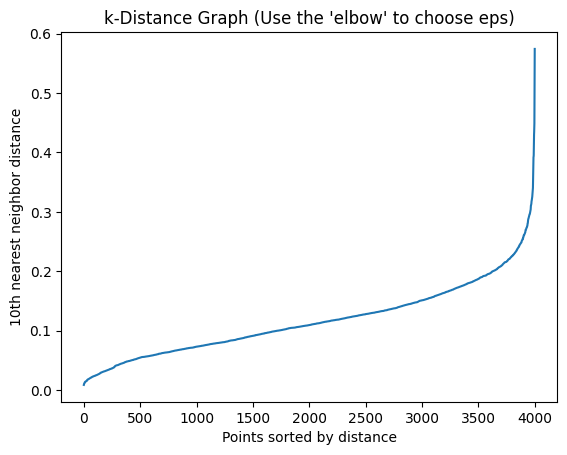

In [49]:
from sklearn.neighbors import NearestNeighbors

neighbors = NearestNeighbors(n_neighbors=10)
neighbors_fit = neighbors.fit(data_umap)
distances, indices = neighbors_fit.kneighbors(data_umap)

distances = np.sort(distances[:, 9])  # 9th NN distance
plt.plot(distances)
plt.title("k-Distance Graph (Use the 'elbow' to choose eps)")
plt.xlabel("Points sorted by distance")
plt.ylabel("10th nearest neighbor distance")
plt.show()


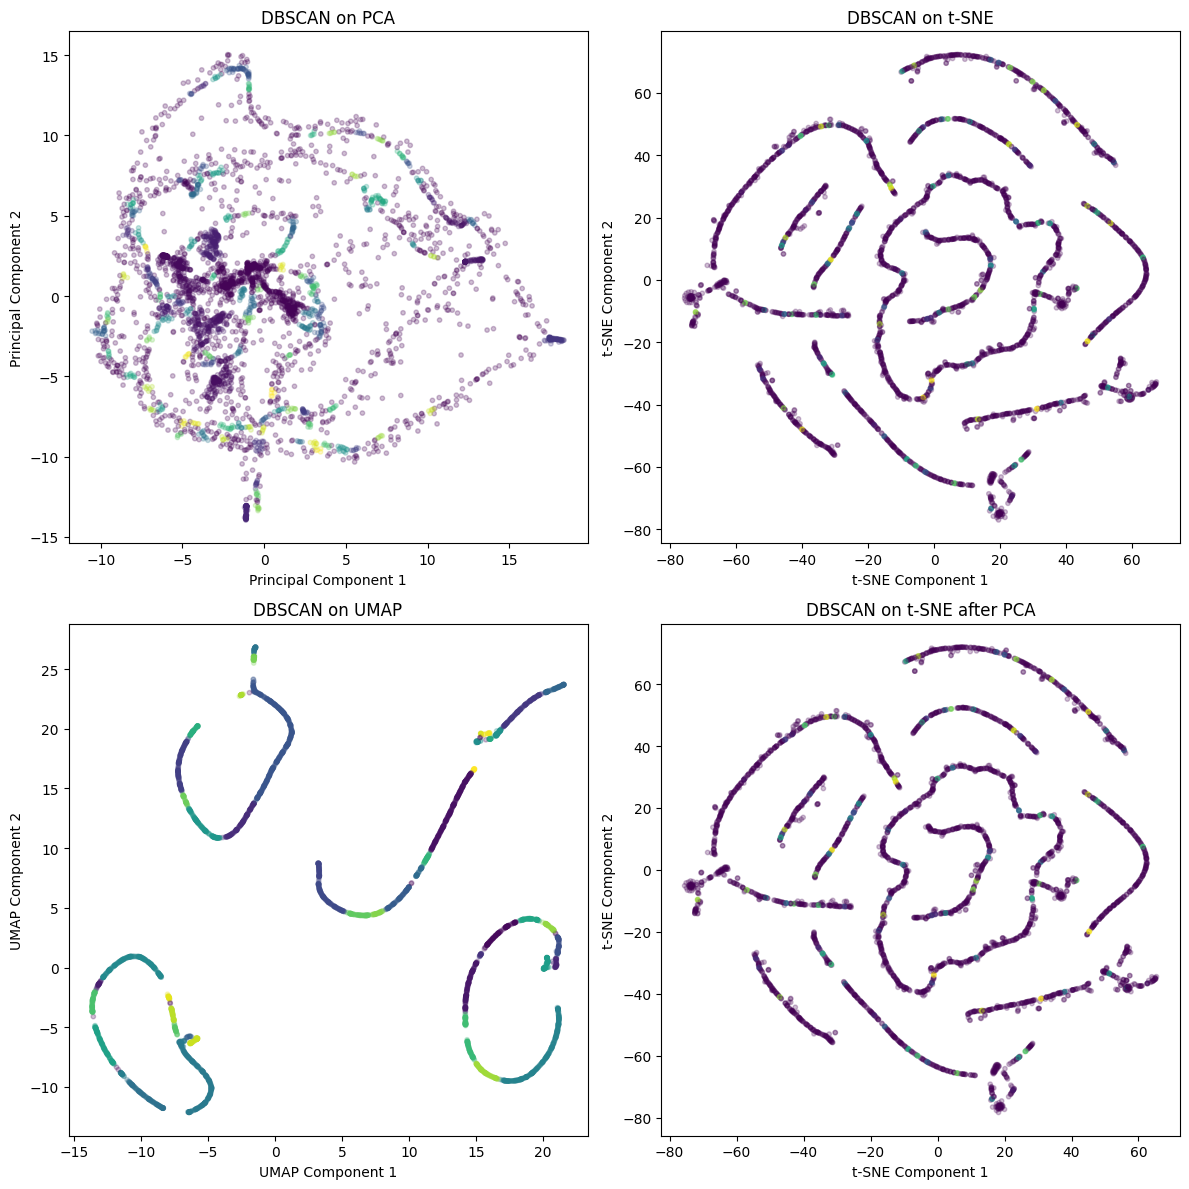

In [48]:
# DBSCAN clustering on multiple embeddings 

eps = 0.22  # neighborhood radius

# 1) Define DBSCAN models 
dbscan_pca     = DBSCAN(eps=eps)
dbscan_tsne    = DBSCAN(eps=eps)
dbscan_umap    = DBSCAN(eps=eps)
dbscan_pca_ts  = DBSCAN(eps=eps)

# 2) Fit & predict on each embedding
dbscanpred_pca    = dbscan_pca.fit_predict(data_pca)
dbscanpred_tsne   = dbscan_tsne.fit_predict(data_tsne)
dbscanpred_umap   = dbscan_umap.fit_predict(data_umap)
dbscanpred_pca_ts = dbscan_pca_ts.fit_predict(data_tsne_pca)

# 3) Visualize the DBSCAN clusters
plt.figure(figsize=(12, 12))

# PCA
plt.subplot(2, 2, 1)
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=dbscanpred_pca, alpha=0.25, s=10)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('DBSCAN on PCA')

# t-SNE
plt.subplot(2, 2, 2)
plt.scatter(data_tsne[:, 0], data_tsne[:, 1], c=dbscanpred_tsne, alpha=0.25, s=10)
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('DBSCAN on t-SNE')

# UMAP
plt.subplot(2, 2, 3)
plt.scatter(data_umap[:, 0], data_umap[:, 1], c=dbscanpred_umap, alpha=0.25, s=10)
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')
plt.title('DBSCAN on UMAP')

# t-SNE after PCA
plt.subplot(2, 2, 4)
plt.scatter(data_tsne_pca[:, 0], data_tsne_pca[:, 1], c=dbscanpred_pca_ts, alpha=0.25, s=10)
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('DBSCAN on t-SNE after PCA')

plt.tight_layout()
plt.show()


In [44]:
for name, labels in zip(
    ["PCA", "t-SNE", "UMAP", "t-SNE after PCA"],
    [dbscanpred_pca, dbscanpred_tsne, dbscanpred_umap, dbscanpred_pca_ts]
):
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    noise_ratio = np.mean(labels == -1)
    print(f"{name}: {n_clusters} clusters, {noise_ratio:.2%} noise")


PCA: 2 clusters, 0.43% noise
t-SNE: 113 clusters, 4.32% noise
UMAP: 8 clusters, 0.00% noise
t-SNE after PCA: 115 clusters, 3.90% noise


# Discussion

#### Which dimensionality reduction methods helped you determine the correct number of clusters? Why did some methods work better than others? Explain the differences between PCA, t-SNE, and UMAP.
- #TODO
#### Which clustering algorithm and hyperparameters did you use? Discuss the differences between algorithms like KMeans and DBSCAN.
- #TODO
#### What is the hidden data type in the dataset? How does this information influence feature extraction for clustering? Can it explain why some dimensionality reduction algorithms are more effective?
- #TODO
#### Identify the server locations. List the specific facilities in Trondheim and explain how you deduced their locations.
- #TODO
#### Extract features using modern pre-trained neural networks for this data type. Apply dimensionality reduction and clustering algorithms to the extracted features.
- #TODO


---

## 🎯 Note: Clustering Accuracy Evaluation

The clustering accuracy metric evaluates how well the predicted clusters match the true clusters, irrespective of the specific labels or names assigned to the clusters.

This means that the evaluation is solely based on the correct grouping of data points rather than the numerical labels of the clusters themselves.

## Key Characteristics

- **Name-Independent**: The metric cares only about how well the data points are grouped together, not the specific numerical or categorical labels used for the clusters.
- **Focus on Grouping**: The evaluation rewards cluster assignments that correctly group the same data points together, regardless of the specific labels assigned.

### Example

If the true cluster assignments are:

```
[0, 0, 0, 1, 1, 1]
```

and your predicted cluster assignments are:

```
[1, 1, 1, 0, 0, 0]
```

the accuracy will still be **1.0** because the grouping of points is identical, even though the numerical labels are swapped.

## How the Metric is Computed

1. **Contingency Matrix**: 
   - Construct a contingency matrix that represents the overlap between the true clusters and the predicted clusters.

2. **Optimal Correspondence**: 
   - Use an optimization algorithm, such as the Hungarian method (linear sum assignment), to find the best possible correspondence between true and predicted labels, maximizing the number of correctly assigned data points.

3. **Accuracy Calculation**: 
   - Calculate the accuracy as the ratio of correctly matched data points to the total number of data points.

> This approach ensures that the evaluation is based on **cluster completeness** and **homogeneity**, rewarding cluster assignments that correctly group the same data points together, regardless of the specific labels used.

---

In [1]:
import numpy as np
import scipy.optimize
import sklearn.metrics

def calculate_clustering_accuracy(true_labels: np.ndarray, cluster_labels: np.ndarray) -> float:
    """
    Calculate the clustering accuracy between true labels and cluster labels.

    The function constructs a contingency matrix between the true labels and cluster labels.
    It then uses the Hungarian algorithm (also known as linear sum assignment) to find the
    best matching between the cluster labels and true labels. The clustering accuracy is 
    calculated as the number of correctly matched labels divided by the total number of labels.

    Args:
        true_labels (np.ndarray): An array of true labels for each data point.
        cluster_labels (np.ndarray): An array of cluster labels predicted by a clustering algorithm.

    Returns:
        float: The clustering accuracy, a value between 0 and 1 representing the proportion of 
               correctly matched labels.
    
    Example:
        >>> true_labels = np.array([0, 1, 2, 0, 1, 2])
        >>> cluster_labels = np.array([1, 2, 0, 1, 2, 0])
        >>> calculate_clustering_accuracy(true_labels, cluster_labels)
        1.0

    Raises:
        ValueError: If true_labels and cluster_labels are not of the same length.
    """
    # Check if the input labels are of the same length
    if true_labels.size != cluster_labels.size:
        raise ValueError("true_labels and cluster_labels must have the same length.")

    # Construct a contingency matrix where each cell [i, j] indicates the number of points with 
    # true label i and cluster label j.
    contingency_matrix = sklearn.metrics.cluster.contingency_matrix(true_labels, cluster_labels)
    
    # Find the best matching between true labels and cluster labels using the Hungarian algorithm.
    # We negate the contingency matrix because linear_sum_assignment finds the minimum cost assignment.
    row_ind, col_ind = scipy.optimize.linear_sum_assignment(-contingency_matrix)
    
    # Calculate the number of correctly assigned labels according to the optimal matching.
    correct_pairs = contingency_matrix[row_ind, col_ind].sum()
    
    # Compute the clustering accuracy as the ratio of correctly matched labels to total labels.
    accuracy = correct_pairs / true_labels.size

    return accuracy

In [2]:
true_labels = np.array([0, 1, 2, 0, 1, 2])
cluster_labels = np.array([1, 2, 0, 1, 2, 0])
calculate_clustering_accuracy(true_labels, cluster_labels)

1.0

In [3]:
true_labels = np.array([0, 0, 0, 0, 0, 0])
cluster_labels = np.array([1, 2, 0, 1, 2, 0])
calculate_clustering_accuracy(true_labels, cluster_labels)

0.3333333333333333

In [4]:
true_labels = np.array([1, 1, 1, 2, 2, 2])
cluster_labels = np.array([0, 0, 0, 0, 0, 0])
calculate_clustering_accuracy(true_labels, cluster_labels)

0.5